In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from tensorflow import keras

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [18]:
x_train.shape

(60000, 28, 28)

In [19]:
X_train = np.reshape( x_train, (60000,28*28) )
X_test = np.reshape( x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]))

In [20]:
X_train.shape

(60000, 784)

In [21]:
X_train = X_train/255.0
X_test = X_test/255.0

In [22]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [23]:
y_train = (y_train%2 == 0).astype(int)
y_test = (y_test%2 == 0).astype(int)

In [24]:
dimension_entrada = X_train.shape[1]
dimension_salida = 1
modelo = Sequential()
modelo.add(Dense(20, input_dim=dimension_entrada,activation="relu"))
dimension_entrada = X_train.shape[1]
dimension_salida = 1
modelo = Sequential()
modelo.add(Dense(20, input_dim=dimension_entrada, activation="relu"))
#modelo.add(Input(shape=dimension_entrada))
#modelo.add(Dense(20, activation="relu"))
modelo.add(Dense(1, activation= "sigmoid"))
sgd = SGD(learning_rate=0.1)
modelo.compile(loss="binary_crossentropy",optimizer=sgd,metrics=["accuracy"])
modelo.summary()



c:\Users\oscar.torresrodrigue\AppData\Local\miniconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,721 (61.41 KB)

 Trainable params: 15,721 (61.41 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
epochs = 10
batch_size = 20
historia = modelo.fit(X_train,y_train,epochs=epochs,batch_size=batch_size, validation_data=[X_test,y_test])


Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 903us/step - accuracy: 0.9068 - loss: 0.2259 - val_accuracy: 0.9598 - val_loss: 0.1116
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 888us/step - accuracy: 0.9675 - loss: 0.0937 - val_accuracy: 0.9752 - val_loss: 0.0737
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 891us/step - accuracy: 0.9744 - loss: 0.0719 - val_accuracy: 0.9742 - val_loss: 0.0751
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 864us/step - accuracy: 0.9791 - loss: 0.0610 - val_accuracy: 0.9738 - val_loss: 0.0713
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 842us/step - accuracy: 0.9818 - loss: 0.0542 - val_accuracy: 0.9801 - val_loss: 0.0597
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 907us/step - accuracy: 0.9832 - loss: 0.0493 - val_accuracy: 0.9806 - val_loss: 0.0584
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 860us/step - accuracy: 0.9856 - loss: 0.0413 - val_accuracy: 0.9787 - val_loss: 0.0601
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 884us/step - accuracy: 0.9859 -

In [26]:
y_pred = modelo(X_test[0:10])
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[5.1697366e-06],
       [9.9720573e-01],
       [2.7199867e-03],
       [9.9998295e-01],
       [9.9927837e-01],
       [7.4798556e-04],
       [9.9967253e-01],
       [2.1407937e-01],
       [8.4493053e-01],
       [1.1958025e-03]], dtype=float32)>

In [27]:
y_test[0:10]

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0])

<Axes: >

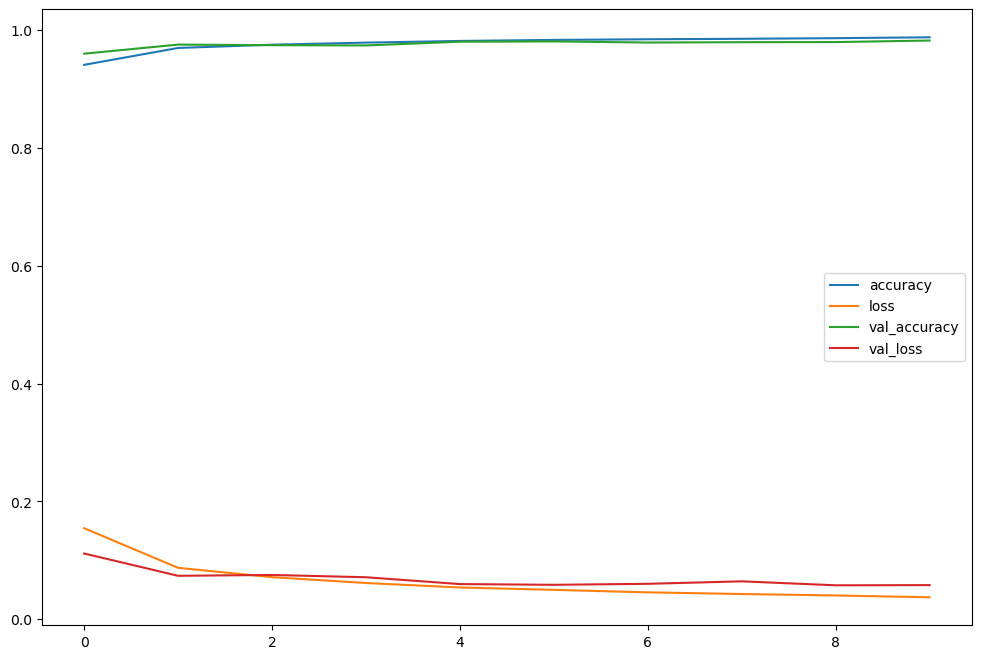

In [28]:
pd.DataFrame(historia.history).plot(figsize=(12,8))

# TensorBoard

In [32]:
#TensorBoard
import os
root_logdir = os.path.join(".", "my_logs")
#modelo.compile(loss="binary_crossentropy", optimizer=sgd,  metrics=["accuracy"])
tensorboard_cb = keras.callbacks.TensorBoard(root_logdir)
epochs = 6
batch_size = 20
historia = modelo.fit(X_train, y_train, epochs=epochs,
                      batch_size = batch_size,
                      callbacks=[tensorboard_cb],
                      validation_data = (X_test, y_test))

Epoch 1/6
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9884 - loss: 0.0336 - val_accuracy: 0.9802 - val_loss: 0.0647
Epoch 2/6
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9884 - loss: 0.0325 - val_accuracy: 0.9822 - val_loss: 0.0559
Epoch 3/6
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9904 - loss: 0.0288 - val_accuracy: 0.9831 - val_loss: 0.0567
Epoch 4/6
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9902 - loss: 0.0284 - val_accuracy: 0.9827 - val_loss: 0.0562
Epoch 5/6
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9904 - loss: 0.0283 - val_accuracy: 0.9813 - val_loss: 0.0603
Epoch 6/6
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9907 - loss: 0.0253 - val_accuracy: 0.9821 - val_loss: 0.0602


In [33]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.